In [7]:
import pandas as pd
import numpy as np
import arimafd as oa
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [12]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv('C:/Users/jun99/OneDrive - 계명대학교/바탕 화면/Project/TP/분석 연습/heart_rate_mk.csv')

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\arimafd\arima\lib\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##### 21년도부터 꾸준히 있음을 확인

In [3]:
df.head()

,tag_id,com.samsung.health.heart_rate.heart_beat_count,com.samsung.health.heart_rate.start_time,com.samsung.health.heart_rate.custom,com.samsung.health.heart_rate.binning_data,com.samsung.health.heart_rate.update_time,com.samsung.health.heart_rate.create_time,com.samsung.health.heart_rate.max,com.samsung.health.heart_rate.min,com.samsung.health.heart_rate.time_offset,com.samsung.health.heart_rate.deviceuuid,com.samsung.health.heart_rate.comment,com.samsung.health.heart_rate.pkg_name,com.samsung.health.heart_rate.end_time,com.samsung.health.heart_rate.datauuid,com.samsung.health.heart_rate.heart_rate
0,21312,1,2021-04-16 10:00,NaN,NaN,2021-04-16 10:00,2021-04-16 10:00,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 10:00,bb8c951a-eda2-43b5-2158-c30a7877d7e1,88
1,21312,1,2021-04-16 15:40,NaN,NaN,2021-04-16 15:40,2021-04-16 15:01,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 15:40,d4a89f2f-22fb-e87c-71e3-8a7921d9aaeb,86
2,21312,1,2021-04-16 21:50,NaN,NaN,2021-04-16 21:55,2021-04-16 21:55,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-16 21:50,83a797cd-cee2-cf07-04e3-0503605d8a1f,71
3,21312,1,2021-04-17 2:30,NaN,NaN,2021-04-17 2:31,2021-04-17 2:22,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-17 2:30,db842272-8440-0047-ba31-0bc5a0423664,79
4,21312,1,2021-04-17 7:10,NaN,NaN,2021-04-17 7:15,2021-04-17 7:03,0.0,0.0,UTC+0900,m7dtbKFfNz,NaN,com.sec.android.app.shealth,2021-04-17 7:10,edbe4c26-33fa-696d-0e0a-6c661ac2c9ba,113


#### 변수명 변경

In [4]:
# Get the existing column names
columns = df.columns.copy()

# Remove the prefix 'com.samsung.health.' from each column name
updated_columns = [column.split('.')[-1] if 'com.samsung.health.' in column else column for column in columns]

# Update the DataFrame with the modified column names
df.columns = updated_columns

# Display the updated DataFrame with the modified column names
print(df.columns)


Index(['tag_id', 'heart_beat_count', 'start_time', 'custom', 'binning_data',
       'update_time', 'create_time', 'max', 'min', 'time_offset', 'deviceuuid',
       'comment', 'pkg_name', 'end_time', 'datauuid', 'heart_rate'],
      dtype='object')


In [15]:
df[['update_time','heart_rate', 'max','min']].head()

,update_time,heart_rate,max,min
0,2021-04-16 10:00:00,88,0.0,0.0
1,2021-04-16 15:40:00,86,0.0,0.0
2,2021-04-16 21:55:00,71,0.0,0.0
3,2021-04-17 02:31:00,79,0.0,0.0
4,2021-04-17 07:15:00,113,0.0,0.0


In [ ]:
# plt.plot(df.update_time, df.heart_rate)

# plt.show()

In [9]:
df['update_time'] = pd.to_datetime(df['update_time'], errors='coerce')

In [23]:
print(df.update_time.tail())

44585   2022-07-03 00:35:00
44586   2022-07-03 01:34:00
44587   2022-07-03 02:33:00
44588   2022-07-03 03:22:00
44589   2022-07-03 05:01:00
Name: update_time, dtype: datetime64[ns]


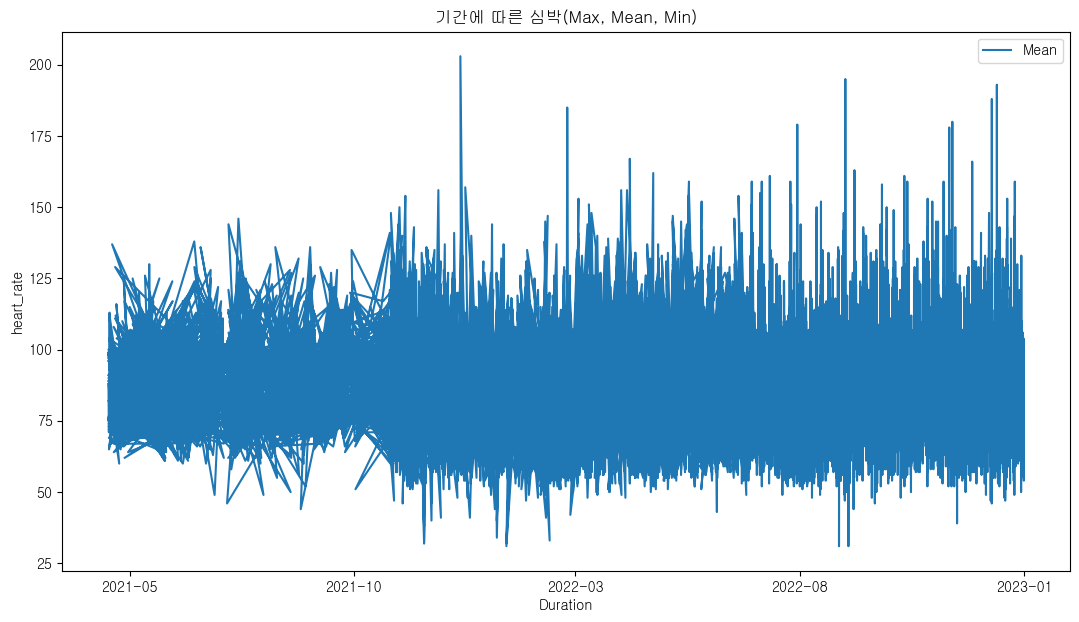

In [16]:
plt.figure(figsize=(13,7))
plt.title('기간에 따른 심박(Max, Mean, Min)')
# plt.plot(df.update_time, df['max'], label='Max')
plt.plot(df.update_time, df['heart_rate'], label='Mean')
# plt.plot(df.update_time, df['min'], label='Min')
plt.xlabel('Duration')
plt.xticks()
plt.ylabel('heart_rate')
plt.legend()

# Set x-axis ticks to be monthly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [22]:
print(df[['update_time','heart_rate']].head(20))

           update_time  heart_rate
0  2021-04-16 10:00:00          88
1  2021-04-16 15:40:00          86
2  2021-04-16 21:55:00          71
3  2021-04-17 02:31:00          79
4  2021-04-17 07:15:00         113
5  2021-04-17 12:20:00         111
6  2021-04-17 19:55:00          76
7  2021-04-18 00:22:00          78
8  2021-04-18 08:21:00          67
9  2021-04-18 15:31:00          85
10 2021-04-18 21:55:00          70
11 2021-04-19 03:51:00          94
12 2021-04-19 12:42:00          76
13 2021-04-19 18:55:00          77
14 2021-04-20 00:55:00          80
15 2021-04-20 08:35:00          98
16 2021-04-20 16:54:00          76
17 2021-04-20 22:50:00          82
18 2021-04-16 08:19:00          99
19 2021-04-21 07:03:00          85


In [19]:
#### 일단 일별 평균, 최대, 최소 만들어보기
mean_daily = df.groupby(df['update_time'].dt.hour)['heart_rate'].agg(['mean', 'min', 'max'])
print(mean_daily)

                  mean  min  max
update_time                     
0            80.764914   46  178
1            84.753212   41  188
2            87.731721   41  154
3            93.973214   50  195
4            95.451111   47  159
5            94.928406   48  151
6            94.606893   31  156
7            93.897747   47  159
8            94.030631   39  145
9            94.769611   47  179
10           96.152258   48  159
11           96.385678   34  152
12           94.469206   33  193
13           92.029744   43  153
14           89.249855   48  203
15           85.581130   42  161
16           81.997122   49  166
17           77.590082   44  159
18           74.188272   44  115
19           71.577061   47  115
20           70.473779   31  113
21           70.605023   40  134
22           71.873684   48  157
23           77.906553   31  145


In [9]:
df_heart = df[['update_time','heart_rate']].copy()

df_heart['update_time'] = d


df_heart.set_index('update_time', inplace=True)
df_heart

,heart_rate
update_time,
18-10-7 11:44,78
18-11-28 5:41,83
19-5-4 2:44,75
19-12-3 9:27,76
20-7-7 13:41,88
...,...
23-9-10 4:00,99
23-9-10 4:50,99
23-9-10 3:12,80


#### ar_order 어떻게 정하는지 찾아보기
> 데이터 60~100만 넣는게 normal

In [101]:
dd = df_heart[:960].copy()

# 60~100

ddy = dd[(dd['heart_rate']<=100)&(dd['heart_rate']>=60)]

In [102]:
ddy.describe()

,heart_rate
count,588.000000
mean,74.707483
std,11.154917
min,60.000000
25%,65.000000
50%,73.000000
75%,84.000000
max,100.000000


In [103]:
ab = df_heart[961:].copy()

print(len(ab[(ab['heart_rate']>100)|(ab['heart_rate']<60)])/len(ab))

0.28879310344827586


In [104]:
additional_values = [300] * 100  # 100개의 300 값을 생성
df_additional = pd.DataFrame({'heart_rate': additional_values})  # 추가할 데이터프레임 생성

df_heart = pd.concat([df_heart, df_additional], ignore_index=True)

print(df_heart.shape)
print(df_heart[1192:1293])

(1293, 1)
      heart_rate
1192          71
1193         300
1194         300
1195         300
1196         300
...          ...
1288         300
1289         300
1290         300
1291         300
1292         300

[101 rows x 1 columns]


In [105]:
df_heart[961:1292] = df_heart[961:1292].sample(frac=1)
print(df_heart[961:1292])

      heart_rate
961           86
962           57
963           91
964           82
965           81
...          ...
1287          64
1288         114
1289          84
1290          82
1291          58

[331 rows x 1 columns]


#### ar order 정하기

In [106]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_heart[:960], order= (1,0,1))
model_fit = model.fit()

model2 = ARIMA(df_heart[:960], order= (2,0,1))
model2_fit = model2.fit()

model3 = ARIMA(df_heart[:960], order= (1,0,2))
model3_fit = model3.fit()

model4 = ARIMA(df_heart[:960], order= (2,0,2))
model4_fit = model4.fit()

model5 = ARIMA(df_heart[:960], order= (3,0,0))
model5_fit = model5.fit()

In [107]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             heart_rate   No. Observations:                  960
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4042.409
Date:                Fri, 15 Sep 2023   AIC                           8094.818
Time:                        15:37:37   BIC                           8119.152
Sample:                             0   HQIC                          8104.085
                                - 960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.2313      3.608     20.852      0.000      68.160      82.303
ar.L1          0.8471      0.023     37.595      0.000       0.803       0.891
ma.L1         -0.2614      0.029     -8.878      0.000      -0.319      -0.204
ma.L2         -0.0254      0.025     -1.032      0.302      -0.074       0.023
sigma2       265.8277      5.954     44.650      0.000     254.159     277.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10695.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             2.26
Prob(H) (two-sided):                  0.53   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
my_arima = oa.Arima_anomaly_detection(ar_order=2)
my_arima.fit(ddy)
ts_anomaly = my_arima.predict(df_heart[961:])
ts_anomaly[ts_anomaly==1]

Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Time seconds: 0.4222080707550049
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection

Series([], dtype: int32)

In [109]:
my_arima = oa.Arima_anomaly_detection(ar_order=2)
my_arima.fit(ddy)
ts_anomaly = my_arima.predict(df_heart[961:])
ts_anomaly[ts_anomaly==1]

Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Time seconds: 0.4220590591430664
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection
Projection

Series([], dtype: int32)

In [58]:
ad = oa.Anomaly_detection(df_heart[:960]) #init anomaly detection algorithm
ad.generate_tensor(ar_order=1) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
# ad.ebeluate_nab() # function for evaluating results of algorithms
ts_anomaly[ts_anomaly==1]

Projection
Projection
Time seconds: 0.6128261089324951


534    1.0
dtype: float64